## Suspicious Trancaction Detection Sysytem

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data set
data1= pd.read_csv("Customer_Master.csv")
data2=pd.read_csv("transactions.csv")
data1

,customer_id,age_group,home_location,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,primary_device,primary_os,primary_browser,avg_transaction_amount,transaction_frequency,employment_status,preferred_transaction_types,international_activity,risk_score
0,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,Samsung Internet,6498.703229,22,Self-employed,"['Loan Payment', 'Internet Bill Payment', 'Wat...",True,30
1,2,26-35,Kathmandu,607,7,Savings,34640.469961,True,Android Tablet,Android,Chrome,3946.766234,6,Employed,"['Loan Payment', 'Branch Deposit', 'QR Payment...",True,33
2,3,56-65,Mustang,589,10,Savings,37965.867755,True,Android Tablet,Android,Edge,13286.477126,27,Employed,"['Branch Deposit', 'Electricity Bill Payment',...",False,8
3,4,46-55,Biratnagar,609,8,Savings,22131.661183,True,iPhone,iOS,Safari,5199.307947,19,Self-employed,"['Insurance Premium Payment', 'Branch Withdraw...",False,18
4,5,26-35,Butwal,706,7,Current,107904.581207,True,iPhone,iOS,Chrome,19884.694305,26,Employed,"['Mobile Recharge', 'Internet Bill Payment', '...",True,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,18-25,Dharan,754,3,Current,92962.629111,False,NaN,NaN,NaN,34816.645493,19,Employed,"['Loan Payment', 'Cable TV Payment', 'Hotel Bo...",False,25
996,997,26-35,Kathmandu,712,8,Current,62111.111894,True,iPhone,iOS,Safari,6797.263602,1,Self-employed,"['POS Transaction', 'Mobile Recharge', 'Hotel ...",False,37
997,998,36-45,Pokhara,444,1,Savings,15000.000000,True,iPhone,iOS,Chrome,3530.238017,21,Student,"['Branch Deposit', 'Inward Remittance', 'Chequ...",True,62
998,999,56-65,Pokhara,697,5,Current,111756.437867,True,Android Tablet,Android,Samsung Internet,39996.866170,7,Retired,"['Wallet Load - IME Pay', 'Mobile Banking Bill...",True,23


In [4]:
## Show that data2
data2

,transaction_id,customer_id,transaction_date,transaction_type,amount,location,ip_address,device,os,browser,...,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,transaction_frequency,employment_status,international_activity,risk_score,is_suspicious
0,TXN20241124104326,727,11/24/2024 15:29,Inward Remittance,13925.72,Nawalparasi,103.92.86.139,NaN,NaN,NaN,...,673,1,Current,65911.89284,True,20,Employed,False,24,False
1,TXN20241204130277,539,12/04/2024 05:26,ATM Withdrawal,25037.35,Kaski,27.201.191.54,NaN,NaN,NaN,...,666,11,Current,75126.72458,True,3,Employed,False,19,False
2,TXN20240813940494,84,8/13/2024 22:42,Cheque Deposit,6677.66,Pokhara,27.231.166.66,NaN,NaN,NaN,...,474,5,Savings,33904.26167,True,14,Employed,False,42,False
3,TXN20240213270855,660,2/13/2024 10:51,School Fee Payment,16071.37,Biratnagar,43.122.204.45,NaN,NaN,NaN,...,680,6,Savings,51961.55841,False,8,Employed,False,26,False
4,TXN20240615309580,398,6/15/2024 9:41,POS Transaction,17196.84,Pokhara,103.67.183.49,NaN,NaN,NaN,...,582,9,Current,122082.36450,True,16,Self-employed,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103495,TXN20230531484024,565,5/31/2023 1:00,Mobile Banking Transfer,19526.81,Butwal,27.222.44.40,Desktop,macOS,Chrome,...,561,9,Savings,32547.32940,True,18,Self-employed,True,32,True
103496,TXN20241221363632,137,12/21/2024 0:00,ATM Withdrawal,10.34,Hetauda,203.41.71.213,Desktop,Windows,Brave,...,513,6,Savings,74156.18617,True,12,Employed,True,27,True
103497,TXN20241221667480,137,12/21/2024 4:00,ATM Withdrawal,234388.66,Dhangadhi,62.58.180.80,Desktop,Windows,Samsung Internet,...,513,6,Savings,74156.18617,True,12,Employed,True,27,True
103498,TXN20241107983306,930,11/07/2024 00:00,ATM Withdrawal,13.87,Butwal,109.161.110.153,Desktop,NaN,Opera,...,757,7,Current,66503.45409,False,20,Employed,True,37,True


In [5]:
## Merget the data1 and data2 on customer_id column
df= pd.merge(data1,data2, on="customer_id" , how='inner')

In [6]:
pd.set_option("display.max_columns",None)
df.head(5)
# It will show all the column present in your data set and 5 rows


,customer_id,age_group_x,home_location_x,credit_score_x,account_age_years_x,account_type_x,avg_monthly_income_x,mobile_banking_user_x,primary_device,primary_os,primary_browser,avg_transaction_amount,transaction_frequency_x,employment_status_x,preferred_transaction_types,international_activity_x,risk_score_x,transaction_id,transaction_date,transaction_type,amount,location,ip_address,device,os,browser,attempt_sequence,time_of_day,transaction_velocity,status,auth_method,amount_deviation,age_group_y,home_location_y,credit_score_y,account_age_years_y,account_type_y,avg_monthly_income_y,mobile_banking_user_y,transaction_frequency_y,employment_status_y,international_activity_y,risk_score_y,is_suspicious
0,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,Samsung Internet,6498.703229,22,Self-employed,"['Loan Payment', 'Internet Bill Payment', 'Wat...",True,30,TXN20240928983325,9/28/2024 17:27,Internet Bill Payment,9707.23,Palpa,27.86.22.5,NaN,NaN,NaN,1,Evening,1,Success,Face Recognition,1.493718,26-35,Palpa,714,13,Savings,55580.82584,True,22,Self-employed,True,30,False
1,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,Samsung Internet,6498.703229,22,Self-employed,"['Loan Payment', 'Internet Bill Payment', 'Wat...",True,30,TXN20240301286037,03/01/2024 18:51,Internet Bill Payment,5044.32,Palpa,210.62.41.218,NaN,NaN,NaN,1,Evening,1,Success,Password,0.776204,26-35,Palpa,714,13,Savings,55580.82584,True,22,Self-employed,True,30,False
2,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,Samsung Internet,6498.703229,22,Self-employed,"['Loan Payment', 'Internet Bill Payment', 'Wat...",True,30,TXN20250314747815,3/14/2025 4:01,Water Bill Payment,7876.14,Palpa,210.51.34.80,NaN,NaN,NaN,1,Late Night,1,Success,Face Recognition,1.211956,26-35,Palpa,714,13,Savings,55580.82584,True,22,Self-employed,True,30,False
3,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,Samsung Internet,6498.703229,22,Self-employed,"['Loan Payment', 'Internet Bill Payment', 'Wat...",True,30,TXN20240404164397,04/04/2024 06:29,POS Transaction,8033.46,Palpa,43.26.97.5,NaN,NaN,NaN,1,Early Morning,4,Success,PIN,1.236164,26-35,Palpa,714,13,Savings,55580.82584,True,22,Self-employed,True,30,False
4,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,Samsung Internet,6498.703229,22,Self-employed,"['Loan Payment', 'Internet Bill Payment', 'Wat...",True,30,TXN20230823193476,8/23/2023 6:14,Loan Payment,8398.52,Palpa,103.233.246.4,NaN,NaN,NaN,1,Early Morning,1,Success,OTP,1.292338,26-35,Palpa,714,13,Savings,55580.82584,True,22,Self-employed,True,30,False


# Data Exploration

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103500 entries, 0 to 103499
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   customer_id                  103500 non-null  int64  
 1   age_group_x                  103500 non-null  object 
 2   home_location_x              103500 non-null  object 
 3   credit_score_x               103500 non-null  int64  
 4   account_age_years_x          103500 non-null  int64  
 5   account_type_x               103500 non-null  object 
 6   avg_monthly_income_x         103500 non-null  float64
 7   mobile_banking_user_x        103500 non-null  bool   
 8   primary_device               89298 non-null   object 
 9   primary_os                   89298 non-null   object 
 10  primary_browser              89298 non-null   object 
 11  avg_transaction_amount       103500 non-null  float64
 12  transaction_frequency_x      103500 non-null  int64  
 13 

In [9]:
# Show all the column present in the data set after merging the data sets
df.columns

Index(['customer_id', 'age_group_x', 'home_location_x', 'credit_score_x',
       'account_age_years_x', 'account_type_x', 'avg_monthly_income_x',
       'mobile_banking_user_x', 'primary_device', 'primary_os',
       'primary_browser', 'avg_transaction_amount', 'transaction_frequency_x',
       'employment_status_x', 'preferred_transaction_types',
       'international_activity_x', 'risk_score_x', 'transaction_id',
       'transaction_date', 'transaction_type', 'amount', 'location',
       'ip_address', 'device', 'os', 'browser', 'attempt_sequence',
       'time_of_day', 'transaction_velocity', 'status', 'auth_method',
       'amount_deviation', 'age_group_y', 'home_location_y', 'credit_score_y',
       'account_age_years_y', 'account_type_y', 'avg_monthly_income_y',
       'mobile_banking_user_y', 'transaction_frequency_y',
       'employment_status_y', 'international_activity_y', 'risk_score_y',
       'is_suspicious'],
      dtype='object')

In [10]:
# It show that there are total 103500 rows and 44 column after merging the data 

In [11]:
### Dropping the column which duplicated column 
df.drop(
    ['device', 'os', 'browser', 'age_group_y', 'home_location_y', 'credit_score_y',
     'account_age_years_y', 'account_type_y', 'avg_monthly_income_y',
     'mobile_banking_user_y', 'transaction_frequency_y',
     'employment_status_y', 'international_activity_y', 'risk_score_y','transaction_id','transaction_type','location'],
    axis=1,
    inplace=True
)


In [12]:
# Seperating date and time from transaction_date column
df['transaction_date'] = pd.to_datetime(df['transaction_date'])



df['time'] = df['transaction_date'].dt.time
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

In [13]:
# Dropping the transaction date column
df.drop('transaction_date',axis=1,inplace=True)

In [14]:
# It will show the column with total null value present in the data set.
df.isnull().sum()

customer_id                        0
age_group_x                        0
home_location_x                    0
credit_score_x                     0
account_age_years_x                0
account_type_x                     0
avg_monthly_income_x               0
mobile_banking_user_x              0
primary_device                 14202
primary_os                     14202
primary_browser                14202
avg_transaction_amount             0
transaction_frequency_x            0
employment_status_x                0
preferred_transaction_types        0
international_activity_x           0
risk_score_x                       0
amount                             0
ip_address                         0
attempt_sequence                   0
time_of_day                        0
transaction_velocity               0
status                             0
auth_method                        0
amount_deviation                   0
is_suspicious                      0
time                               0
d

### show that null value in 
* primary_device ,primary_os ,primary_browser column.


In [16]:
## Replacing the null value with mode beacause data type of primary_device ,primary_os ,primary_browser is object.¶
df["primary_device"].fillna(df["primary_device"].mode()[0],inplace=True)
df['primary_os'].fillna(df['primary_os'].mode()[0], inplace=True)
df['primary_browser'].fillna(df['primary_browser'].mode()[0], inplace=True)


In [17]:
## It show total column in data set.
df.columns

Index(['customer_id', 'age_group_x', 'home_location_x', 'credit_score_x',
       'account_age_years_x', 'account_type_x', 'avg_monthly_income_x',
       'mobile_banking_user_x', 'primary_device', 'primary_os',
       'primary_browser', 'avg_transaction_amount', 'transaction_frequency_x',
       'employment_status_x', 'preferred_transaction_types',
       'international_activity_x', 'risk_score_x', 'amount', 'ip_address',
       'attempt_sequence', 'time_of_day', 'transaction_velocity', 'status',
       'auth_method', 'amount_deviation', 'is_suspicious', 'time'],
      dtype='object')

In [18]:
# It will show total number of rows and columns present in the data set
df.shape

(103500, 27)

In [19]:
# It will descibe the numerical column by static
df.describe()

,customer_id,credit_score_x,account_age_years_x,avg_monthly_income_x,avg_transaction_amount,transaction_frequency_x,risk_score_x,amount,attempt_sequence,transaction_velocity,amount_deviation,time
count,103500.000000,103500.000000,103500.000000,103500.000000,103500.000000,103500.000000,103500.000000,103500.000000,103500.000000,103500.000000,103500.000000,103500.000000
mean,501.242512,650.852560,6.555855,72653.579880,17925.406513,14.304889,24.755285,21734.724266,1.038415,2.804126,1.216757,11.236483
std,289.768879,96.990921,3.563704,46263.471568,13539.578667,6.620290,12.151438,32653.595339,0.322031,1.884274,1.261134,7.001940
min,1.000000,315.000000,1.000000,15000.000000,1530.783367,1.000000,1.000000,10.040000,1.000000,1.000000,0.000132,0.000000
25%,250.000000,588.000000,4.000000,41912.760146,8573.484698,10.000000,16.000000,7966.807500,1.000000,2.000000,0.752486,5.000000
50%,502.000000,650.000000,7.000000,61954.634162,14478.530466,14.000000,24.000000,14032.685000,1.000000,3.000000,1.016647,11.000000
75%,753.000000,722.000000,9.000000,90734.127328,22863.278086,19.000000,33.000000,24577.622500,1.000000,4.000000,1.282026,17.000000
max,1000.000000,850.000000,19.000000,320079.183052,97516.677350,35.000000,90.000000,960094.330000,5.000000,15.000000,36.126379,23.000000


# Insight :
* The dataset consists of 103,500 unique customer IDs.

* The average credit score across all customers is approximately 650.85.

* Customers have an average account age of about 6 years and 5 months.

* The mean monthly income of customers is Rs. 72,653.58.

* The most frequently transferred amount is Rs. 97,516.68.

* The highest recorded risk score is 90.

In [22]:
# It will describe the categorical column.
df.describe(include=["object","bool"])

,age_group_x,home_location_x,account_type_x,mobile_banking_user_x,primary_device,primary_os,primary_browser,employment_status_x,preferred_transaction_types,international_activity_x,ip_address,time_of_day,status,auth_method,is_suspicious
count,103500,103500,103500,103500,103500,103500,103500,103500,103500,103500,103500,103500,103500,103500,103500
unique,6,25,4,2,6,5,7,5,999,2,103445,5,2,6,2
top,26-35,Kathmandu,Savings,True,Desktop,Android,Chrome,Employed,"['QR Payment', 'Airline Ticket Payment', 'Bran...",False,27.16.173.215,Business Hours,Success,Password,False
freq,31088,24185,62255,89298,29663,43841,28338,67587,192,71784,2,33608,102522,20307,96739


# Insight:
*The majority of customers fall within the 26–35 age group.

* Most customers are from Kathmandu.

* A large proportion of customers hold savings accounts.

* Mobile banking is the most commonly used service, with 89,298 users.

* Desktop is the primary device used by most customers.

* The majority of customers are employed, totaling 67,587 individuals.

* Most transactions are related to QR payments and airline ticket payments.

* Password-based authentication is the most widely used method.

* Most transactions occur during business hours.


## Exploratery Data Analysis

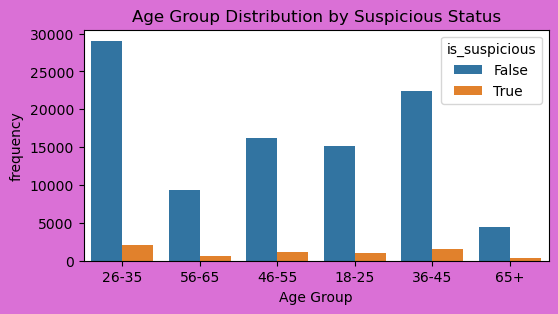

In [28]:
# Compare age group distribution by suspicious status using a count plot

plt.figure(figsize=(6,3), facecolor="orchid")
sns.countplot(data=df,x="age_group_x",hue="is_suspicious")
plt.title("Age Group Distribution by Suspicious Status")
plt.xlabel("Age Group")
plt.ylabel("frequency")
plt.show()

## Insight:
* The majority of suspicious activities are associated with customers aged 26–35.
* Very few suspicious activities are observed among customers aged above 65.


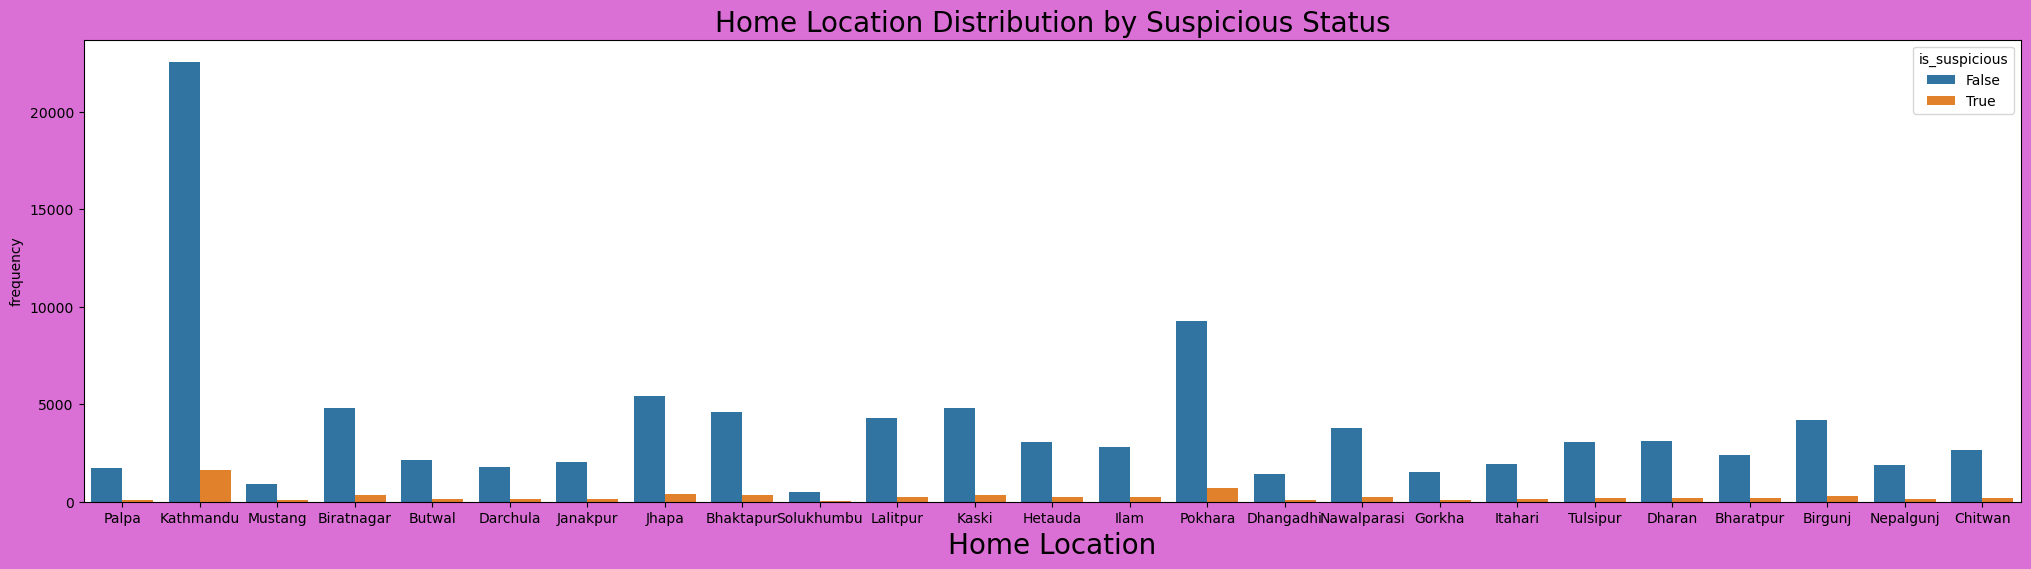

In [35]:
# Compare home location distribution by suspicious status

plt.figure(figsize=(25,6), facecolor="orchid")
sns.countplot(data=df, x="home_location_x", hue="is_suspicious")
plt.title("Home Location Distribution by Suspicious Status",fontsize=20)
plt.xlabel("Home Location",fontsize=20)
plt.ylabel("frequency")
plt.show()


# Insight:
* Across all home locations, non-suspicious cases dominate, indicating that suspicious activity is relatively rare overall.

* Kathmandu has the highest number of records for both suspicious and non-suspicious users, suggesting higher activity volume due to population density and urban concentration.

* Other major cities such as Pokhara, Jhapa, Bhaktapur, Lalitpur, and Birgunj also show higher counts, but the suspicious cases remain a small proportion compared to normal cases.

* Rural or less-populated areas (e.g., Mustang, Solukhumbu, Darchula) have very low frequencies for both categories, indicating limited activity rather than elevated risk.

* The pattern of suspicious activity generally follows overall population distribution, not a specific location-driven anomaly.

In [37]:
df["mobile_banking_user_x"] = df["mobile_banking_user_x"].map({
    True: "Mobile Banking User",
    False: "Non-Mobile User"
})


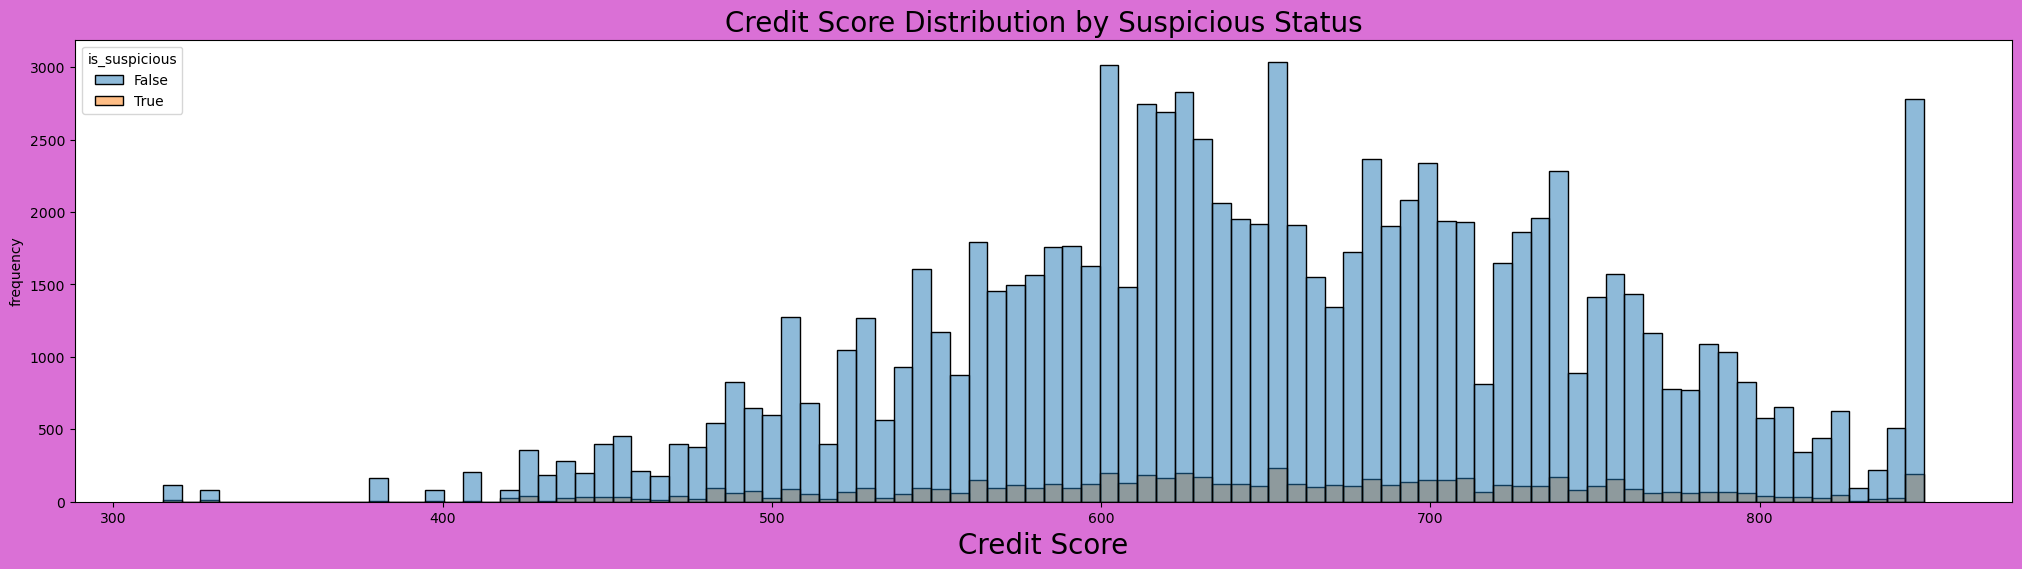

In [38]:
# Compare credit score distribution by suspicious status

plt.figure(figsize=(25,6), facecolor="orchid")
sns.histplot(data=df, x="credit_score_x", hue="is_suspicious")
plt.title("Credit Score Distribution by Suspicious Status", fontsize=20)
plt.xlabel("Credit Score", fontsize=20)
plt.ylabel("frequency")
plt.show()


# Insight:
* Suspicious activities increase as the credit score rises.

* No suspicious activities are observed when the credit score is below 400.

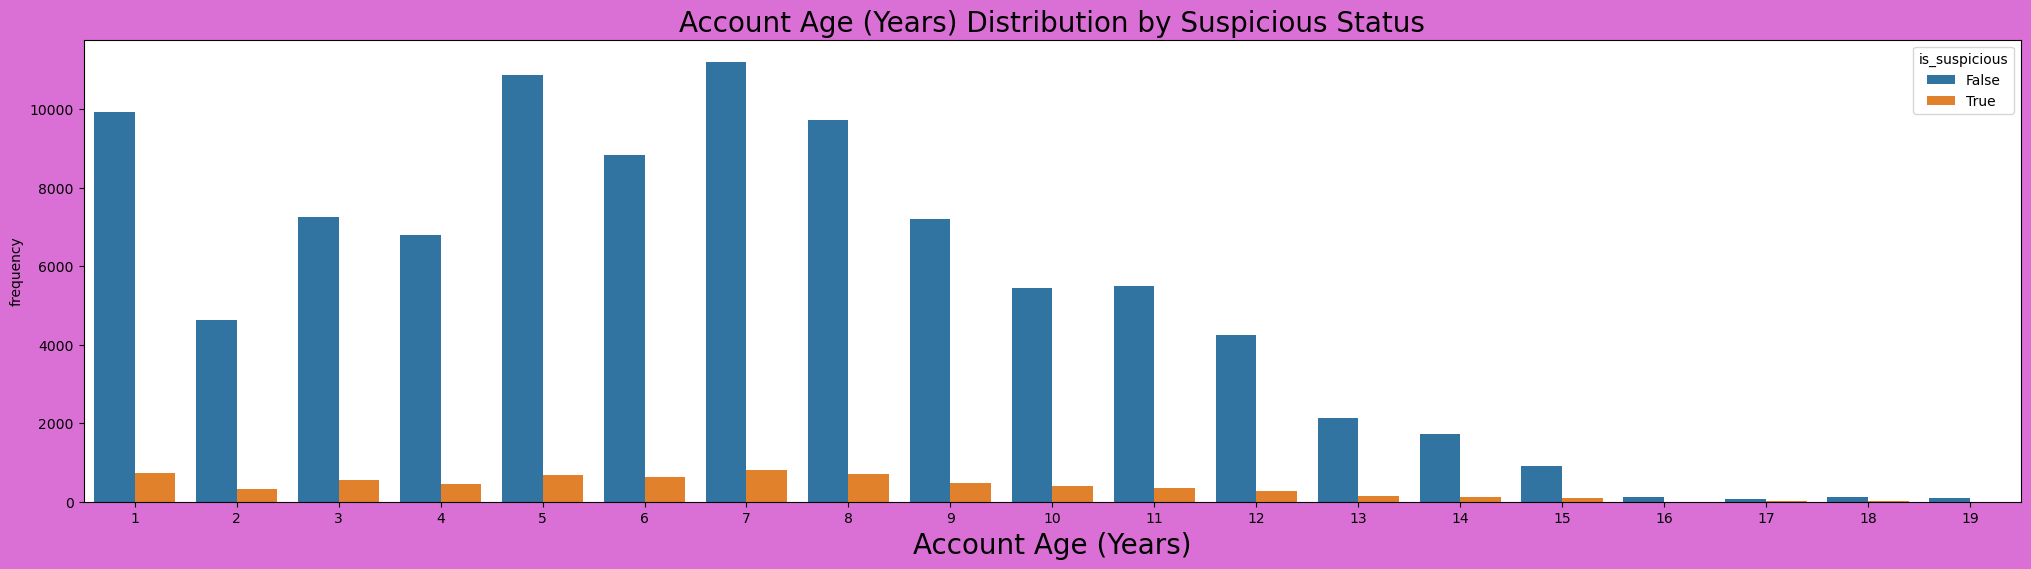

In [46]:
# Compare account age (years) distribution by suspicious status

plt.figure(figsize=(25,6), facecolor="orchid")
sns.countplot(data=df, x="account_age_years_x", hue="is_suspicious")
plt.title("Account Age (Years) Distribution by Suspicious Status", fontsize=20)
plt.xlabel("Account Age (Years)", fontsize=20)
plt.ylabel("frequency")
plt.show()


# Insight:
* Suspicious activities are observed among accounts aged between 1 and 15 years.

* No suspicious activities are recorded for accounts older than 15 years.

* Customers who opened their accounts more than 15 years ago show no involvement in suspicious activities.


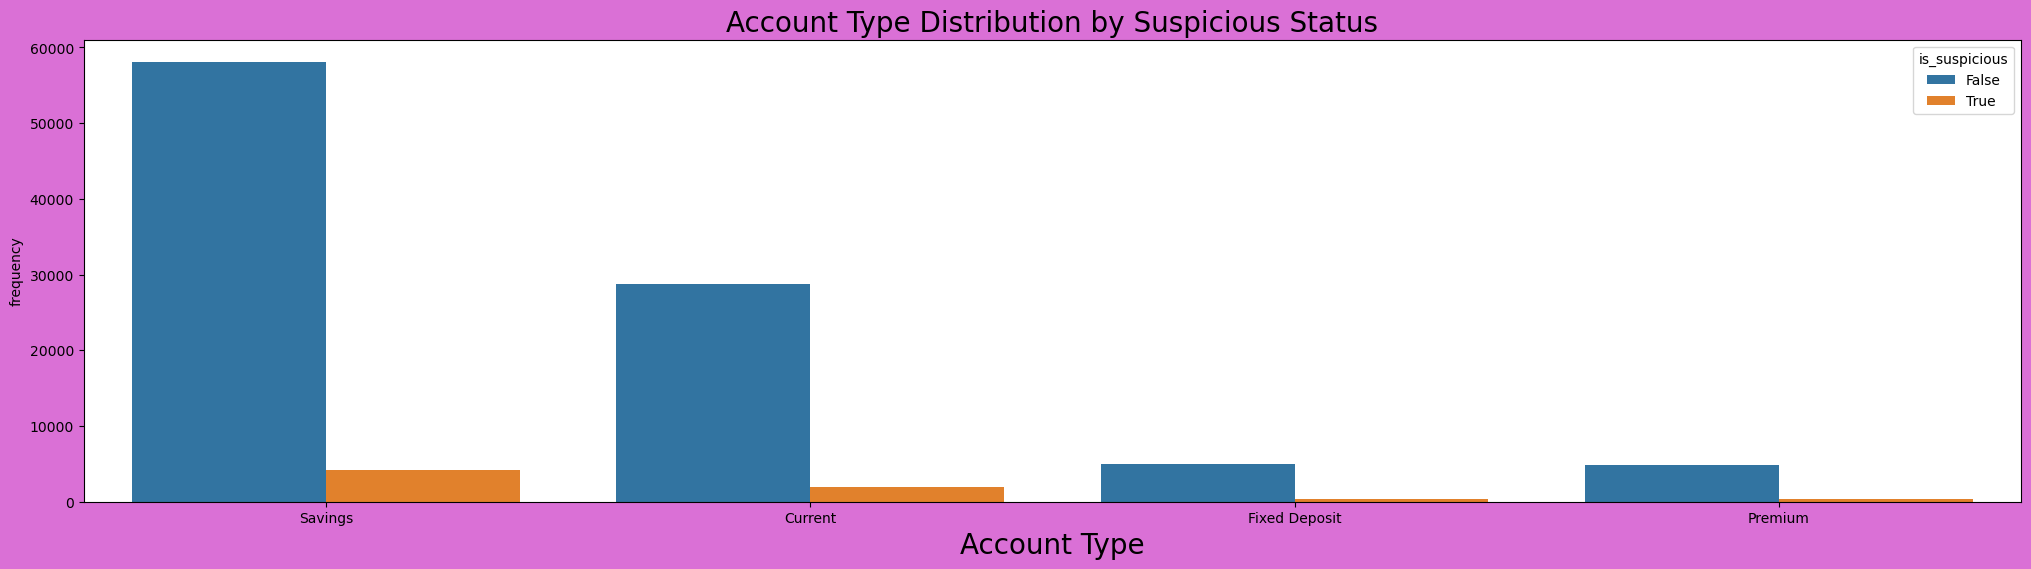

In [49]:
# Compare account type distribution by suspicious status

plt.figure(figsize=(25,6), facecolor="orchid")
sns.countplot(data=df, x="account_type_x", hue="is_suspicious")
plt.title("Account Type Distribution by Suspicious Status", fontsize=20)
plt.xlabel("Account Type", fontsize=20)
plt.ylabel("frequency")
plt.show()


# Insight:
* Suspicious activities are more frequently observed in savings accounts.

* Very few suspicious activities occur in premium and fixed deposit accounts.

In [52]:
df["time_ampm"] = df["time"].apply(
    lambda x: f"{12 if x % 12 == 0 else x % 12} {'AM' if x < 12 else 'PM'}"
)


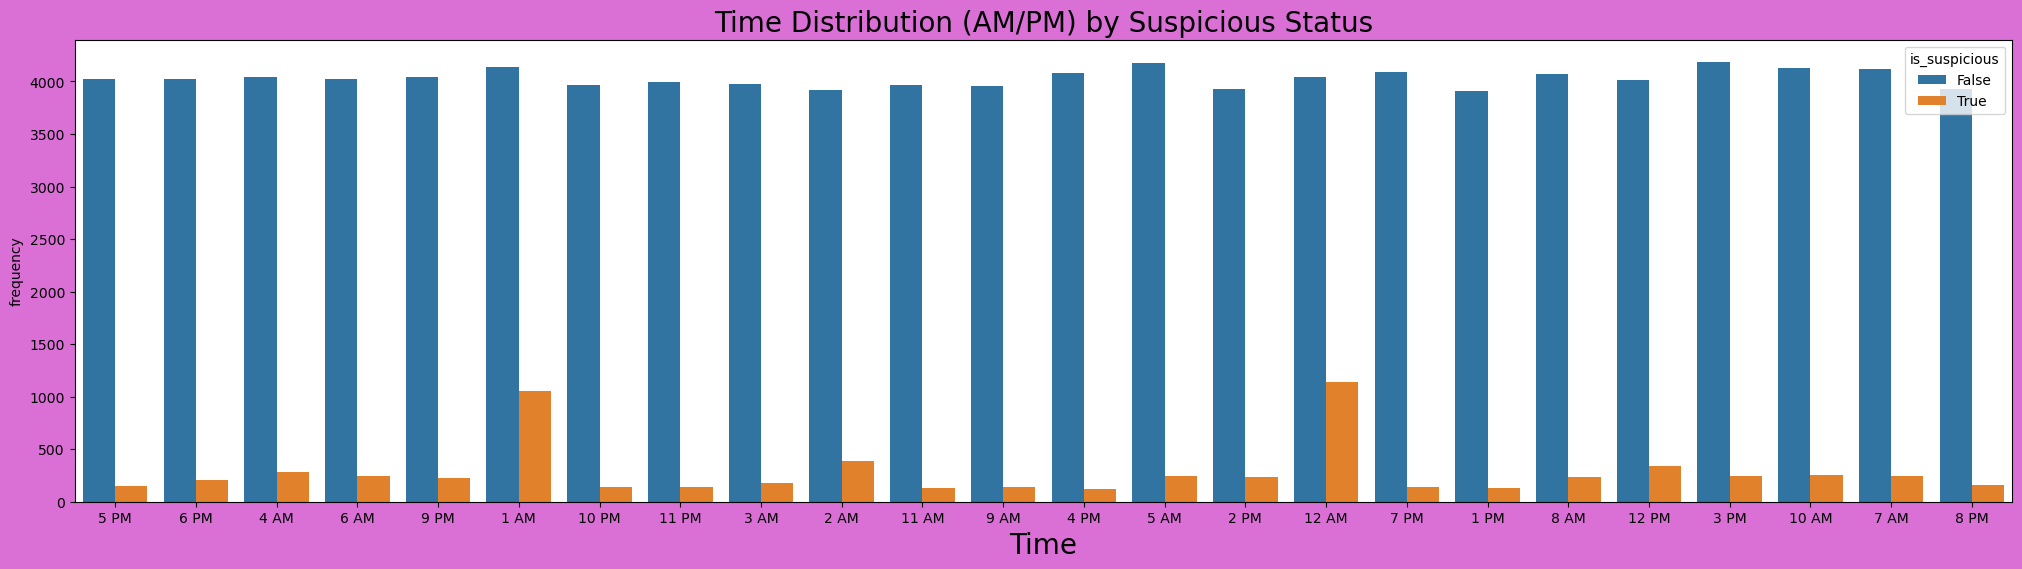

In [53]:
# Compare time (AM/PM) distribution by suspicious status

plt.figure(figsize=(25,6), facecolor="orchid")
sns.countplot(data=df, x="time_ampm", hue="is_suspicious")
plt.title("Time Distribution (AM/PM) by Suspicious Status", fontsize=20)
plt.xlabel("Time", fontsize=20)
plt.ylabel("frequency")
plt.show()


# Insight:
* Non-suspicious activity remains consistently high across all time periods, indicating stable normal behavior throughout the day.

* Suspicious activity is not evenly distributed over time and shows noticeable spikes during late-night and early-morning hours.

* The highest suspicious counts occur around 12 AM and 1 AM, suggesting increased risk during off-peak hours when monitoring and user verification may be weaker.

* Early morning times (2 AM–5 AM) also show relatively elevated suspicious activity compared to daytime hours.

* Daytime periods (9 AM–5 PM) generally have lower suspicious frequencies, indicating more regular and predictable user behavior.

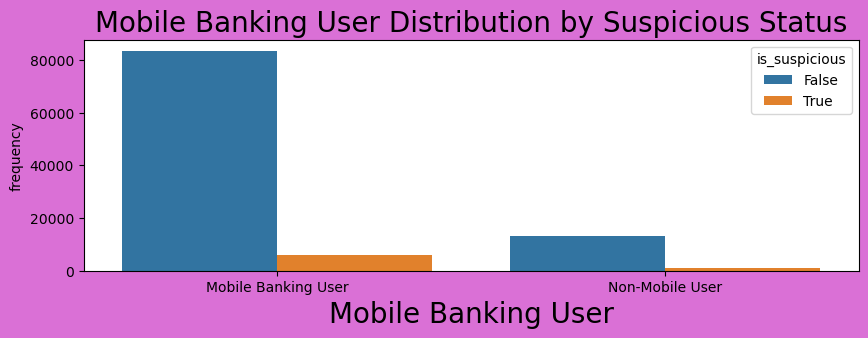

In [56]:

# Compare mobile banking user distribution by suspicious status

plt.figure(figsize=(10,3), facecolor="orchid") 
sns.countplot(data=df,x="mobile_banking_user_x",hue="is_suspicious") 
plt.title("Mobile Banking User Distribution by Suspicious Status", fontsize=20)
plt.xlabel("Mobile Banking User", fontsize=20)
plt.ylabel("frequency")
plt.show()

# Insight :
* The majority of mobile banking users are not suspicious, indicating overall system reliability.

* Suspicious users are more frequent among mobile banking users compared to non-mobile users.

* Non-mobile users show a lower count and lower risk of suspicious activity.



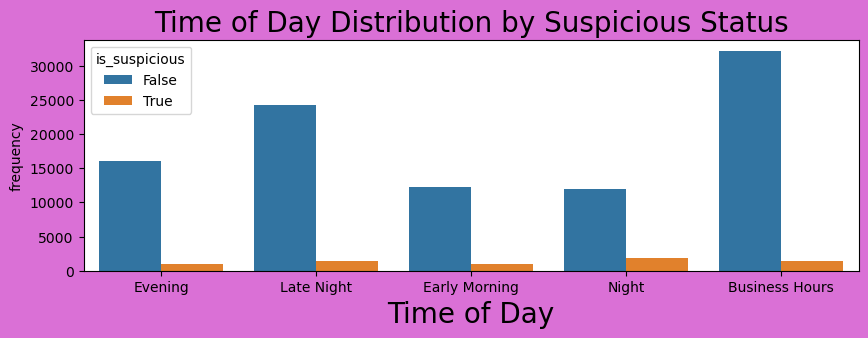

In [58]:
# Compare time of day distribution by suspicious status
plt.figure(figsize=(10,3), facecolor="orchid")
sns.countplot(data=df,x="time_of_day",hue="is_suspicious")
plt.title("Time of Day Distribution by Suspicious Status", fontsize=20)
plt.xlabel("Time of Day", fontsize=20)
plt.ylabel("frequency")
plt.show()

# Insight :
* Business hours have the highest overall transaction volume, with most activities being non-suspicious.

* Late night and night periods show a higher concentration of suspicious transactions compared to other times.

* Early morning has the lowest transaction activity and relatively fewer suspicious cases.

* Suspicious activity is more likely outside standard business hours, indicating higher risk during off-peak times.

# Data preprocessing

In [63]:
## Seperate the numerical column and categorical column
numeric_cols = df.select_dtypes(include=['number','bool'])

#categorical_cols = df.select_dtypes(include=['object', 'category'])

In [64]:
numeric_cols.columns

Index(['customer_id', 'credit_score_x', 'account_age_years_x',
       'avg_monthly_income_x', 'avg_transaction_amount',
       'transaction_frequency_x', 'international_activity_x', 'risk_score_x',
       'amount', 'attempt_sequence', 'transaction_velocity',
       'amount_deviation', 'is_suspicious', 'time'],
      dtype='object')

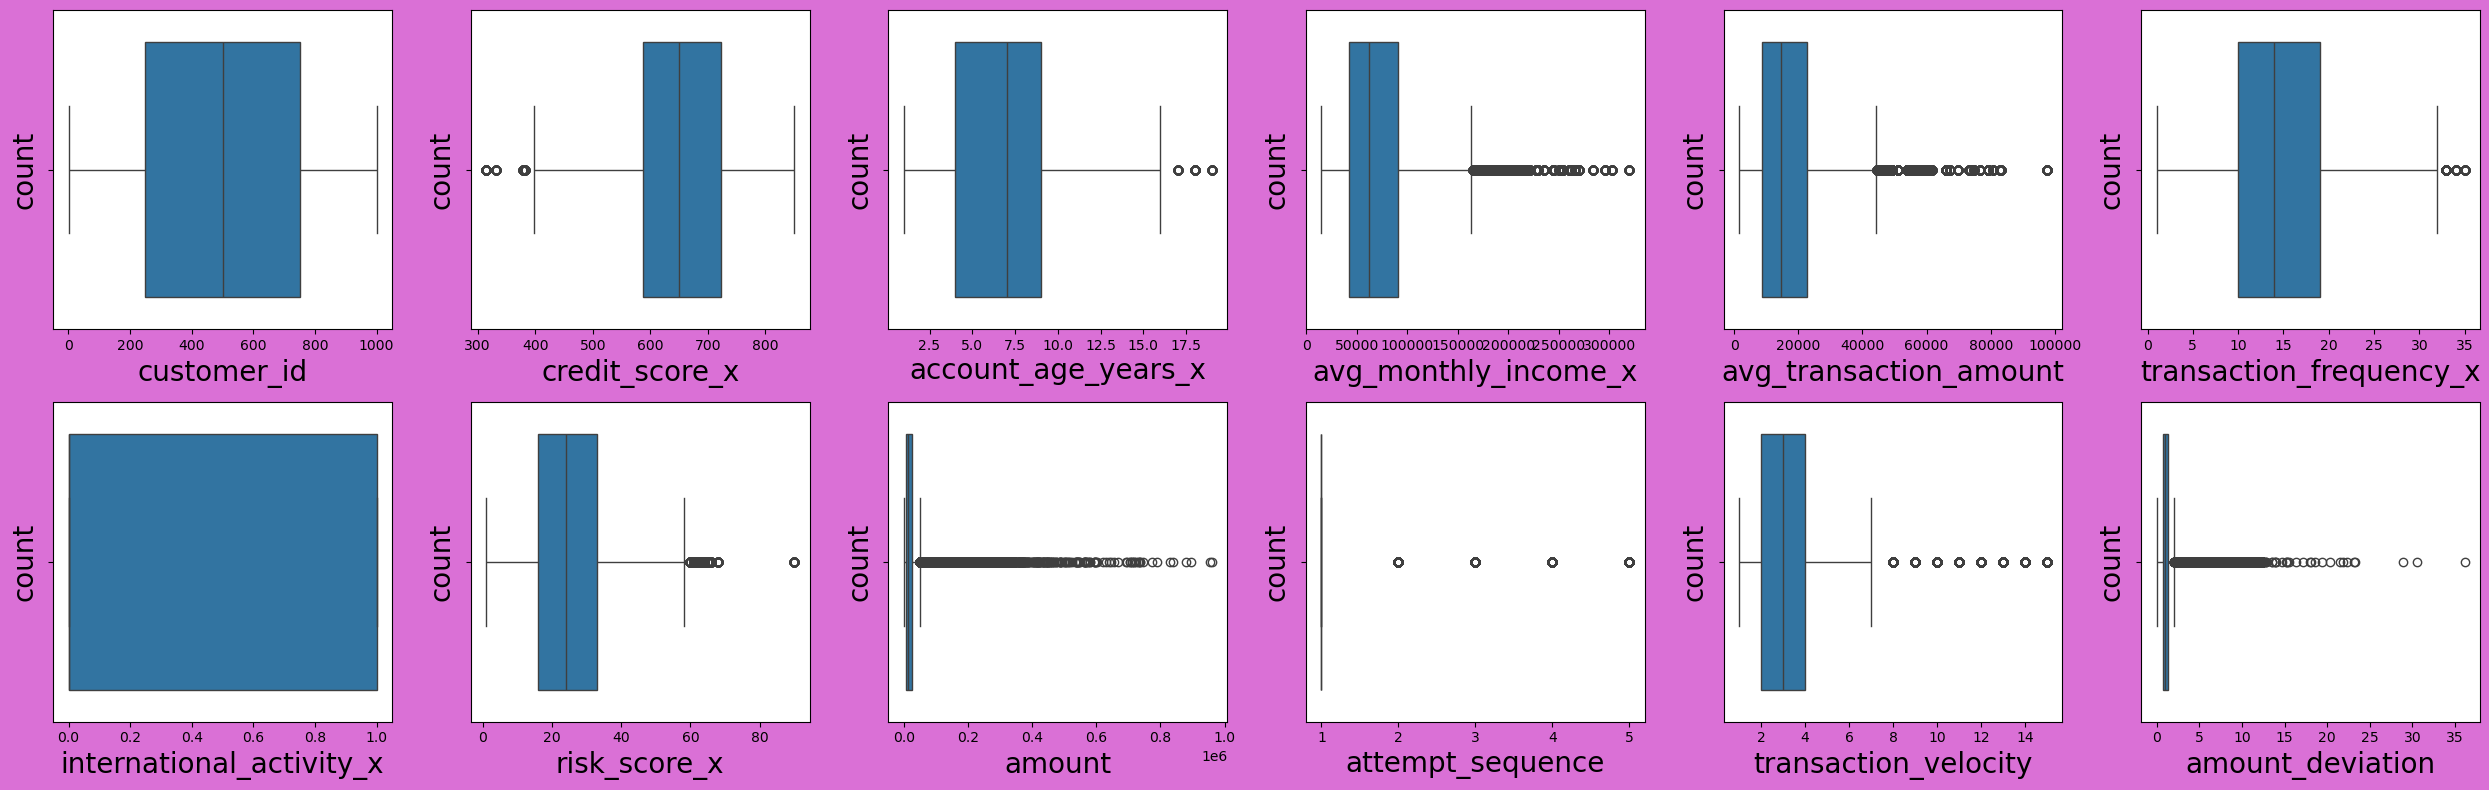

In [65]:
# Find the outliers in all numerical columns
plt.figure(figsize=(25,8),facecolor="orchid")
plotnum=1
for column in numeric_cols:
    if plotnum <13:
        ax=plt.subplot(2,6,plotnum)
        sns.boxplot(x=numeric_cols[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
    plotnum+=1
    
plt.tight_layout()
plt.show()
        

#insight:
* We can see outliers in credit_score_x,account_age_year_x,avg_monthly_income_x, outliers 

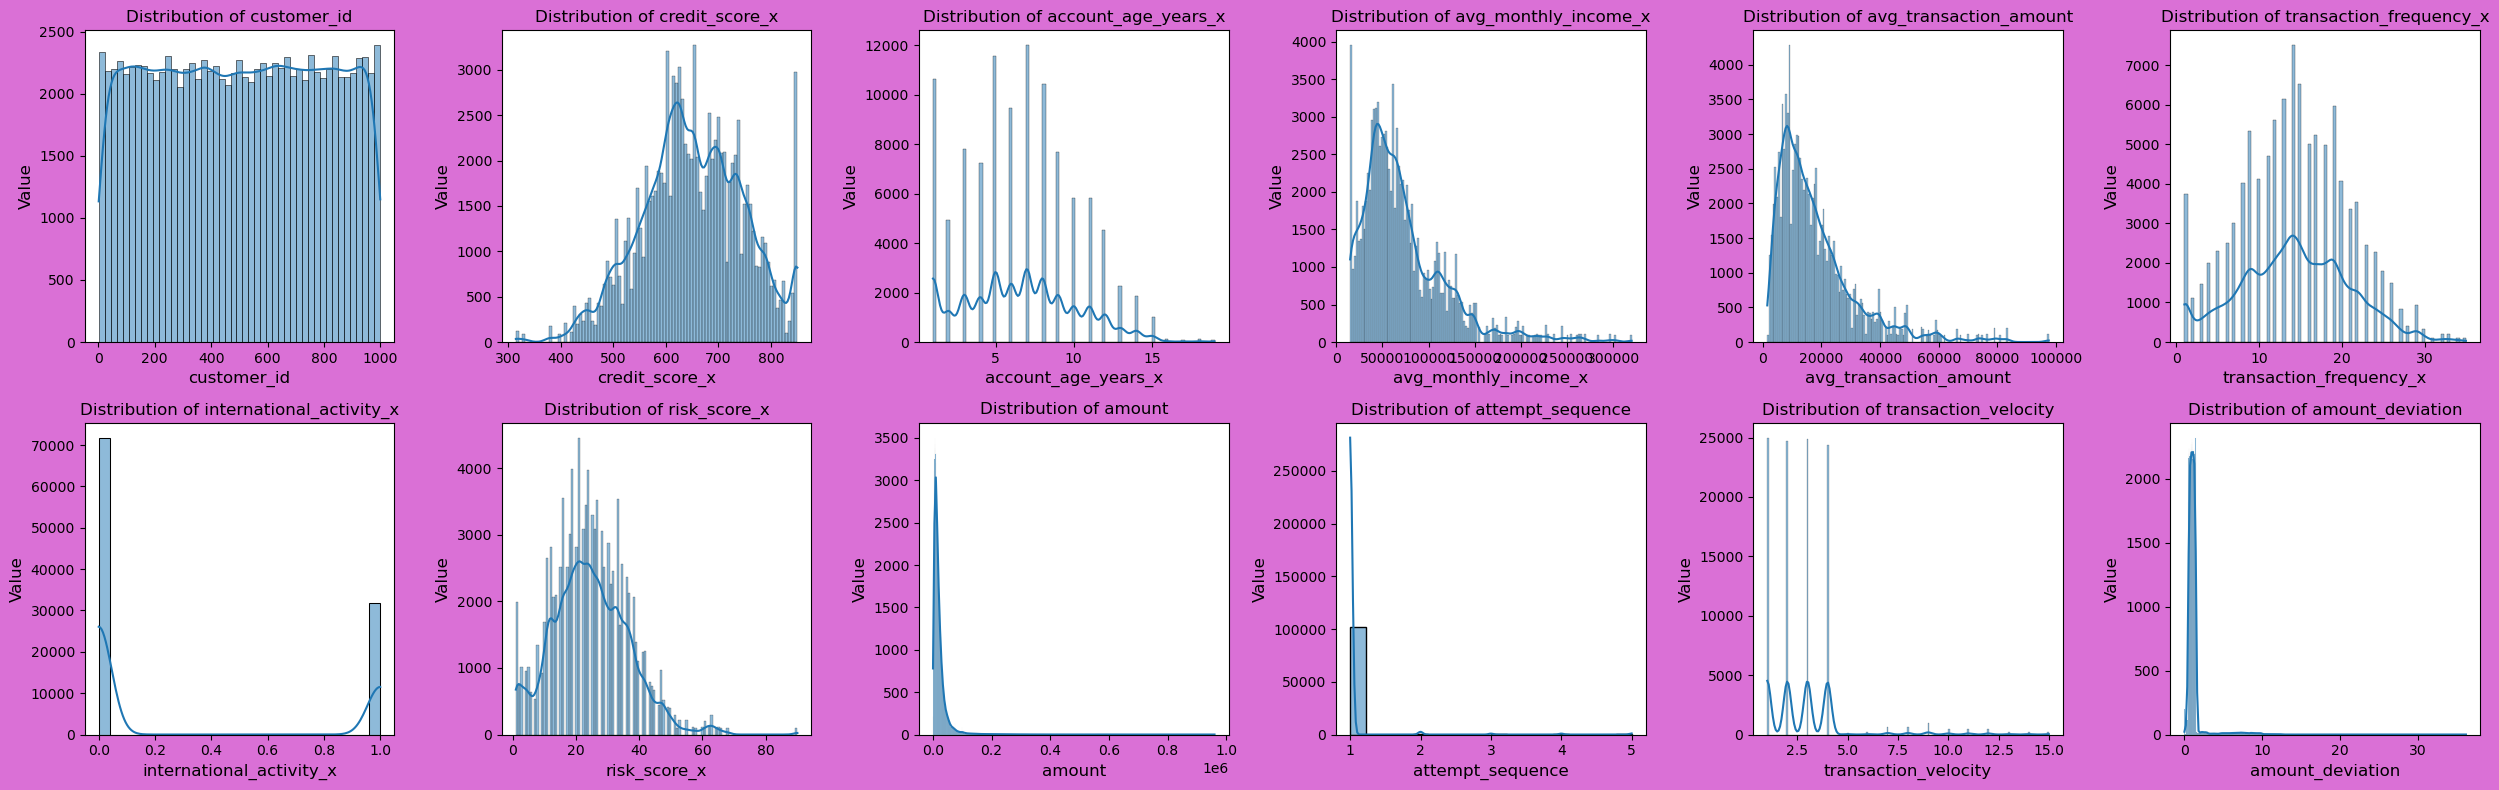

In [68]:
# Ploting the histplot to know the Distribution in numericsl columns.
plt.figure(figsize=(25, 8), facecolor="orchid")

plotnum = 1
for column in numeric_cols:
    if plotnum <= 12:  # because we have 2 rows × 4 columns
        plt.subplot(2, 6, plotnum)
        sns.histplot(x=numeric_cols[column],kde=True)
        plt.xlabel(column, fontsize=12)
        plt.ylabel("Value", fontsize=12)
        plt.title(f"Distribution of {column}")
        plotnum += 1

plt.tight_layout()
plt.show()


## Handling Outliers credit_scr

In [70]:
# Removing the outliers in cerdit_Score
# finding the Q1 value of  cerdit_Score
Q1_credit_scr= numeric_cols["credit_score_x"].quantile(0.25)

In [71]:
# Finding the Q3 value of credit_score_x
Q3_credit_scr = numeric_cols["credit_score_x"].quantile(0.75)

In [72]:
IQR_credit= Q3_credit_scr-Q1_credit_scr

In [74]:
# Finding the lower_limit of credit score 
lower_lim_credit = Q1_credit_scr-3*IQR_credit

In [75]:
# finding the upper limit of credit score
upper_lim_credit = Q3_credit_scr+3*IQR_credit

In [77]:
# finding the percentage of total outlier in colum 
len(
    numeric_cols.loc[
        (numeric_cols["credit_score_x"] > upper_lim_credit) |
        (numeric_cols["credit_score_x"] < lower_lim_credit)
    ]
) / len(df)


0.0

In [79]:
## Replacing the outliers with median value
numeric_cols.loc[
(numeric_cols["credit_score_x"]>=upper_lim_credit)
|(numeric_cols["credit_score_x"]<lower_lim_credit)
,"credit_score_x"]=numeric_cols["credit_score_x"].median()

# Handling the outliers in avg_monthly_income_x

In [81]:
# Finding the Q1 and Q3 for avg_monthly_income_x
Q1_avg_monthly_income_x=numeric_cols['avg_monthly_income_x'].quantile(0.25)
Q3_avg_monthly_income_x=numeric_cols['avg_monthly_income_x'].quantile(0.75)


In [82]:
IQR_avg_monthly_income_x = Q3_avg_monthly_income_x 
- Q1_avg_monthly_income_x

-41912.76014619954

In [84]:
# Finding the lower_limit of avg_monthly_income_x
lower_lim_avg_monthly_income_x = Q1_avg_monthly_income_x 
- 3*IQR_avg_monthly_income_x

-272202.3819843066

In [85]:
# Finding the upper_limit of avg_monthly_income_x
upper_lim_avg_monthly_income_x = Q3_avg_monthly_income_x 
+ 3*IQR_avg_monthly_income_x

272202.3819843066

In [87]:
#finding the percentage of outliers in data
len(
    numeric_cols.loc[
        (numeric_cols["avg_monthly_income_x"] < lower_lim_avg_monthly_income_x) |
        (numeric_cols["avg_monthly_income_x"] > upper_lim_avg_monthly_income_x)
    ]
) / len(df)


0.4985893719806763

# Insight:
* we can see that there is 1.1 % total outliers in the avg_monthly_income_x column. 

In [91]:
## Replacing the outliers with median value
numeric_cols.loc[
(numeric_cols["avg_monthly_income_x"]>=upper_lim_avg_monthly_income_x)
&(numeric_cols["avg_monthly_income_x"]<lower_lim_avg_monthly_income_x)
,"avg_monthly_income_x"]=numeric_cols["avg_monthly_income_x"].median()

# Replacing Outliers in avg_transaction_amount

In [94]:
# Finding the Q1 and Q3 for avg_monthly_income_x
Q1_avg_transaction_amount=numeric_cols['avg_transaction_amount'].quantile(0.25)
Q3_avg_transaction_amount=numeric_cols['avg_transaction_amount'].quantile(0.75)


In [95]:
IQR_avg_transaction_amount = Q3_avg_transaction_amount - Q1_avg_transaction_amount

In [96]:
# Finding the lower_limit of avg_transaction_amount
lower_avg_transaction_amount = Q1_avg_transaction_amount - 3*IQR_avg_transaction_amount

In [97]:
# Finding the upper_limit of avg_transaction_amount
upper_avg_transaction_amount = Q3_avg_transaction_amount + 3*IQR_avg_transaction_amount

In [98]:
#finding the percentage of outliers in avg_transaction_amount 
len(
    numeric_cols.loc[
        (numeric_cols["avg_transaction_amount"] < lower_avg_transaction_amount) |
        (numeric_cols["avg_transaction_amount"] > upper_avg_transaction_amount)
    ]
) / len(df)


0.013884057971014493

In [99]:
## Replacing the outliers with median value
numeric_cols.loc[
    (numeric_cols["avg_transaction_amount"] > upper_avg_transaction_amount) |
    (numeric_cols["avg_transaction_amount"] < lower_avg_transaction_amount),
    "avg_transaction_amount"
] = numeric_cols["avg_transaction_amount"].median()


## Feature Engineering 


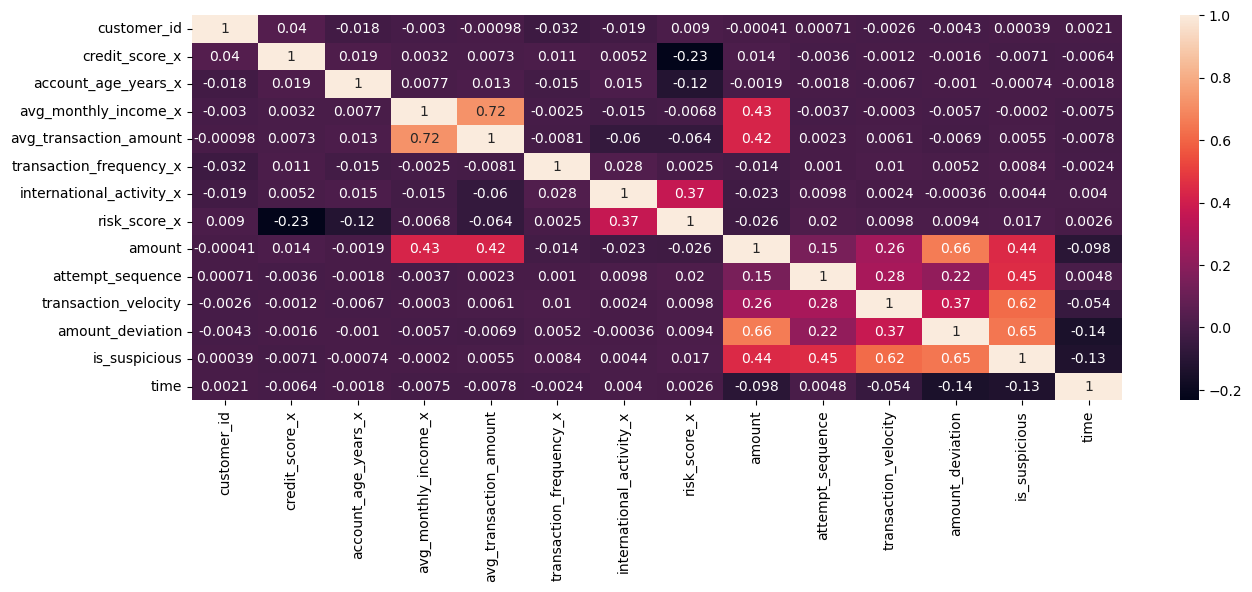

In [101]:
plt.figure(figsize=(15,5))
sns.heatmap(numeric_cols.corr(), annot=True)
plt.show()

# Insight:
* The average monthly income variable is highly correlated with the average transaction amount variable, so one of them should be dropped to avoid multicollinearity.

* The customer ID, credit score, and average monthly income variables show very weak correlation with the target variable, so they can be safely removed.

In [103]:
# Dropping the very less correlated colun with target column
df.drop(["customer_id","credit_score_x","avg_monthly_income_x"],axis=1, inplace=True)

In [104]:
categorical_cols = df.select_dtypes(include=['object', 'category'])

In [105]:
categorical_cols.columns

Index(['age_group_x', 'home_location_x', 'account_type_x',
       'mobile_banking_user_x', 'primary_device', 'primary_os',
       'primary_browser', 'employment_status_x', 'preferred_transaction_types',
       'ip_address', 'time_of_day', 'status', 'auth_method', 'time_ampm'],
      dtype='object')

In [106]:
## Dropping the 'ip_address' because it have many unique vale which is not suitable for logestic regression
df.drop('ip_address',axis=1,inplace=True)

In [108]:
# Seperating the target column and input column
y = df["is_suspicious"]   
X = df.drop("is_suspicious", axis=1)


In [109]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=4)

In [110]:
#mapping status success as 1 and failed as 0.
df["status"] = df["status"].map({"Success": 1, "Failed": 0})


In [111]:
## applying Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

time_encoder = OrdinalEncoder(
    categories=[[
        "Early Morning",
        "Business Hours",
        "Evening",
        "Late Night",
        "Night"
    ]]
)

df["time_of_day"] = time_encoder.fit_transform(df[["time_of_day"]])


In [112]:
cat_cols = X_train.select_dtypes(include='object').columns

X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test  = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# align train & test columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)  


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


# Apply SMOTE because data is not balanced.

In [116]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_scaled, y_train
)


# Check data is balance or not after aplying SMOTE

In [118]:
print(y_train.value_counts())
print(y_train_smote.value_counts())


is_suspicious
False    67737
True      4713
Name: count, dtype: int64
is_suspicious
False    67737
True     67737
Name: count, dtype: int64


# Applying Logestic regression

In [120]:
log_reg = LogisticRegression(max_iter=1000,class_weight=None,  random_state=42)

log_reg.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=1000, random_state=42)

# Make prediction

In [122]:
y_pred = log_reg.predict(X_test_scaled)


In [123]:
y_pred

array([False, False,  True, ..., False, False, False])

In [124]:
#Evaluate the model 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[28812   190]
 [  202  1846]]
              precision    recall  f1-score   support

       False       0.99      0.99      0.99     29002
        True       0.91      0.90      0.90      2048

    accuracy                           0.99     31050
   macro avg       0.95      0.95      0.95     31050
weighted avg       0.99      0.99      0.99     31050



# Insight:
* Out of all actual non-suspicious transactions, 28,753 were correctly predicted as non-suspicious
 while 249 were wrongly predicted as suspicious.

* Out of all actual suspicious transactions 1823 were correctly identified as suspicious, and 225 were missclassified as non_suspicious.

  
* Out of all transactions predicted as suspicious, 88% are actually suspicious,
indicating that the model’s predictions are highly reliable.
